In [113]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [115]:
from sklearn.datasets import load_boston

In [116]:
boston = load_boston()

In [117]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

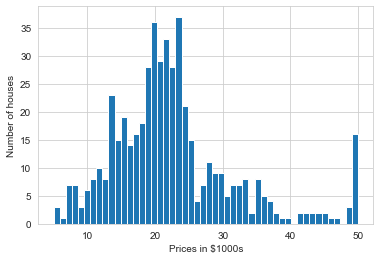

In [118]:
plt.hist(boston.target, bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

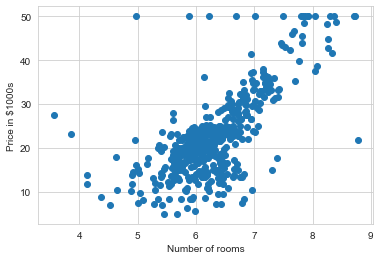

In [119]:
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [120]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [121]:
boston_df['Price'] = boston.target

In [122]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [123]:
# sns.Implot('RM', 'Price', data=boston_df)

### The mathematics behind the Least Mean Squares Method.

### Using Numpy for a Univariate Linear Regression

In [124]:
X = boston_df.RM
X.shape

(506,)

In [125]:
X = np.vstack(boston_df.RM)

In [126]:
X.shape

(506, 1)

In [127]:
Y = boston_df.Price

In [128]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [129]:
# [X 1]
X = np.array( [ [value,1] for value in X ] )

In [130]:
X

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [131]:
# m, b = np.linalg.lstsq(X, Y)[0]

In [132]:
# plt.plot(boston_df.RM, boston_df.Price, 'o')

# x = boston_df.RM

# plt.plot(x, m*x + b, 'r', label='Best Fit Line')

### Getting the error

In [133]:
# result = np.linalg.lstsq(X,Y)

# error_total = result[1]

# rmse = np.sqrt(error_total/len(X))

# print('The root mean square error was %.2f' %rmse)

### Using scikit learn to implement a multivariate regression

In [134]:
# Import for Linear Regression

import sklearn
from sklearn.linear_model import LinearRegression

In [135]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [136]:
X_multi = boston_df.drop('Price', 1)

Y_target = boston_df.Price

In [137]:
lreg.fit(X_multi, Y_target)

LinearRegression()

In [138]:
print('The estimated intercept coefficient is %.2f' % lreg.intercept_)

print('The number of coefficients usd was %d ' %len(lreg.coef_))

The estimated intercept coefficient is 36.46
The number of coefficients usd was 13 


In [139]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Using Training and Validation

In [140]:
import sklearn.model_selection

X_train,X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, boston_df.Price)

In [141]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [142]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression()

In [143]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [149]:
print('Fit a model X_train, and calculate the MSE with Y_train: %.2f' % np.mean((Y_train - pred_train)**2))

print('Fit a model X_train, and calculate MSE with X-test and Y_test: %.2f ' % np.mean((Y_test - pred_test)**2))

Fit a model X_train, and calculate the MSE with Y_train: 48.82
Fit a model X_train, and calculate MSE with X-test and Y_test: 28.25 


### Residual Plots

Text(0.5, 1.0, 'Residual Plots')

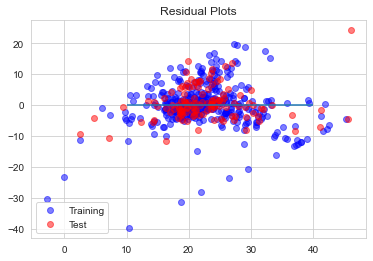

In [151]:
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha=0.5)

test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha=0.5)

plt.hlines(y=0,xmin=10,xmax=40)

plt.legend((train, test), ('Training', 'Test'), loc='lower left')

plt.title('Residual Plots')